# 信用卡欺诈检测 Credit Card Fraud Detection

## 背景 Background

假设有一份信用卡交易记录，遗憾的是数据经过了脱敏处理，只知道其特征，却不知道每一个字段 代表什么含义，没关系，就当作是一个个数据特征。在数据中有两种类别，分别是正常交易数据和异常 交易数据，字段中有明确的标识符。要做的任务就是建立逻辑回归模型，以对这两类数据进行分类

Assume there is a set of credit card transaction records. Unfortunately, the data has been anonymized, so while we know the features, we don't know what each field represents. That's okay; we can treat them as individual data features. In the data, there are two categories: normal transaction data and fraudulent transaction data, and there is a clear identifier for each category. The task is to build a logistic regression model to classify these two types of data.

## 数据分析和预处理 Data Analysis and Preprocessing

### 查看数据格式、正常异常样本分布 

Check Data Format, Normal and Anomalous Sample Distribution

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 读取数据 / Load the dataset
data = pd.read_csv("creditcard.csv")

# 输出前几行数据 / Display the first few rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class
0    284315
1       492
Name: count, dtype: int64


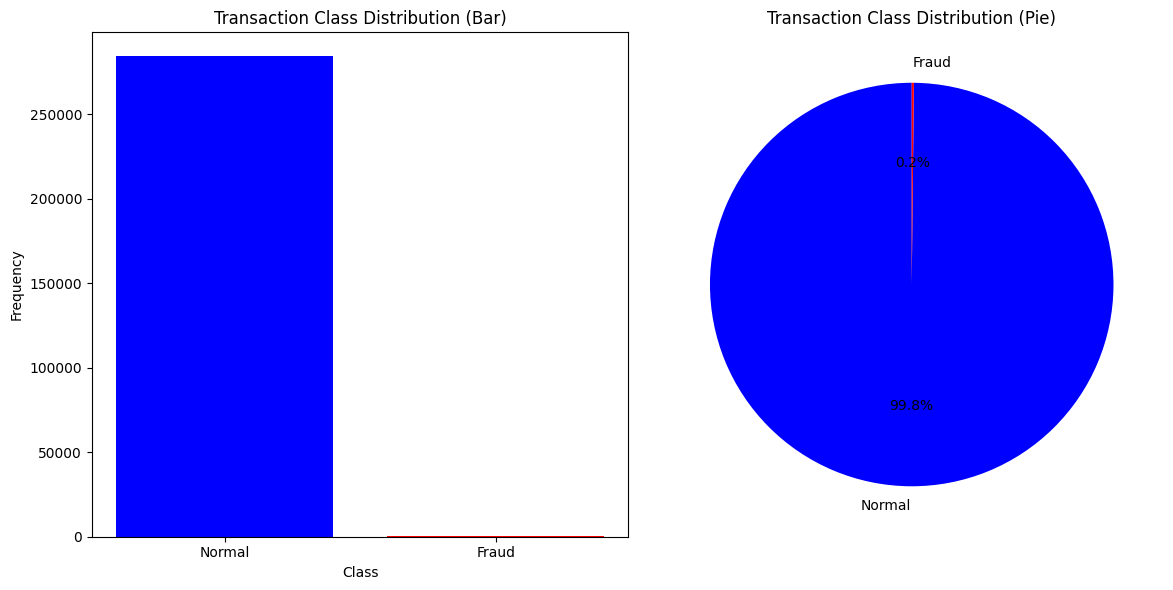

In [3]:
# 查看数据的分布统计情况并画条形图 
# Check the data distribution and plot a bar chart
count_classes = data['Class'].value_counts()
print(count_classes)

# 创建一个图形框架，分为1行2列
# Create a figure with 1 row and 2 columns
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# 在第一个位置（1行1列）绘制条形图 
# Plot a bar chart in the first position (1 row, 1 column)
ax[0].bar(count_classes.index, count_classes.values, color=['blue', 'red'])
ax[0].set_title('Transaction Class Distribution (Bar)')  # 设置条形图的标题 / Set the bar chart's title
ax[0].set_xlabel('Class')  # 设置X轴标签 / Set X-axis label
ax[0].set_ylabel('Frequency')  # 设置Y轴标签 / Set Y-axis label
ax[0].set_xticks([0, 1])  # 设置X轴刻度 / Set X-axis ticks
ax[0].set_xticklabels(['Normal', 'Fraud'])  # 设置X轴刻度标签 / Set X-axis tick labels

# 在第二个位置（1行2列）绘制饼图 
# Plot a pie chart in the second position (1 row, 2 columns)
ax[1].pie(count_classes.values, labels=['Normal', 'Fraud'], autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
ax[1].set_title('Transaction Class Distribution (Pie)')  # 设置饼图的标题 / Set the pie chart's title

# 显示整个图形 
# Display the entire plot
plt.tight_layout()
plt.show()

###  处理样本不均衡问题 Addressing Sample Imbalance Issues

方案一：下采样（抽样正常数据）

方案二：过采样（制造异常数据）

Option 1: Undersampling (Sampling Normal Data)

Option 2: Oversampling (Generating Anomalous Data)


###  特征标准化 Feature Standardization

处理特征数据的均值和离散程度不同 

Handling Differences in Mean and Dispersion of Feature Data

In [4]:
from sklearn.preprocessing import StandardScaler

# 代码使用 StandardScaler方法对数据进行标准化处理，调用时需先导入该模块，然后进行 fit_transform操作，相当于执行公式。
# reshape(−1,1)的含义是将传入数据转换成一列的形式(需按 照函数输入要求做)。
# 最后用drop操作去掉无用特征。上述输出结果中的normAmount列就是标准化处理后的结果，可见数值都在较小范围内浮动。
data = pd.read_csv("creditcard.csv")
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


## 下采样 Undersamping

In [5]:
# 先导入依赖包 
# First, import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 使 matplotlib 输出内嵌在笔记本中 
# Make matplotlib inline for Jupyter notebooks
%matplotlib inline

# 特征标准化 
# Feature standardization
data = pd.read_csv("creditcard.csv")  # 读取数据集 / Load the dataset
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))  # 标准化金额特征 / Standardize the 'Amount' feature
data = data.drop(['Time', 'Amount'], axis=1)  # 删除 'Time' 和 'Amount' 特征 / Drop 'Time' and 'Amount' columns

# 从数据中抽取特征和标签 
# Extract features and labels from the data
X = data.drop('Class', axis=1)  # 特征 / Features (excluding 'Class')
y = data['Class']  # 标签 / Labels (Class column)

# 获取所有正常和异常数据的索引 
# Get indices for all normal (Class=0) and fraud (Class=1) data
normal_data = data[data['Class'] == 0]  # 正常数据 / Normal data
fraud_data = data[data['Class'] == 1]  # 欺诈数据 / Fraud data

# 从正常样本抽取和异常样本数量相同的样本 
# Sample from normal data to match the number of fraud samples
fraud_cnt = len(fraud_data)  # 欺诈数据的数量 / Number of fraud cases
sample_normal_data = normal_data.sample(n=fraud_cnt)  # 随机抽样正常数据 / Randomly sample normal data

# 使用正常抽样数据+异常数据=组成新数据 
# Combine sampled normal data and all fraud data to create a new dataset
under_sample_data = pd.concat([sample_normal_data, fraud_data], axis=0)

# 对整个数据集进行划分 
# Split the entire dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 对下采样数据集进行划分 
# Split the undersampled dataset
X_undersample = under_sample_data.drop('Class', axis=1)  # 特征 / Features (excluding 'Class')
y_undersample = under_sample_data['Class']  # 标签 / Labels (Class column)
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(
    X_undersample, y_undersample, test_size=0.3, random_state=0
)

### 计算最佳正则化惩罚粒度 Calculate the Optimal Regularization Penalty Granularity

In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report 

def printing_Kfold_scores(x_train_data, y_train_data):
    # 创建一个KFold实例，划分为5个子集，且不进行洗牌
    # Create a KFold instance with 5 splits, without shuffling
    fold = KFold(n_splits=5, shuffle=False) 

    # 定义不同力度的正则化惩罚力度 
    # Define different regularization strengths
    c_param_range = [0.01, 0.1, 1, 10, 100]

    # 创建用于展示结果的表格 
    # Create a table to display results
    results_table = pd.DataFrame(columns=['C_parameter', 'Mean_recall_score'])
    results_table['C_parameter'] = c_param_range

    # 遍历每一个正则化惩罚力度 
    # Loop over each regularization strength
    for c_param in c_param_range:
        # print('-------------------------------------------')
        # print('正则化惩罚力度:', c_param)
        # print('-------------------------------------------')

        recall_accs = []  # 用于保存每次交叉验证的召回率 / To store recall scores for each cross-validation fold

        # 执行交叉验证 
        # Perform cross-validation
        for train_index, test_index in fold.split(x_train_data):
            # 指定逻辑回归模型，使用L1正则化 / Specify a logistic regression model with L1 regularization
            lr = LogisticRegression(C=c_param, penalty='l1', solver='liblinear')

            # 对交叉训练集数据进行模型训练 
            # Train the model on the training fold
            lr.fit(x_train_data.iloc[train_index], y_train_data.iloc[train_index])

            # 在交叉测试集上预测结果 
            # Predict on the validation fold
            y_pred = lr.predict(x_train_data.iloc[test_index])

            # 计算召回率 
            # Calculate the recall score
            recall_acc = recall_score(y_train_data.iloc[test_index], y_pred)
            recall_accs.append(recall_acc)

            # print(f'Iteration: {len(recall_accs)}')
            # print(f'test_index_start={test_index[0]}, test_index_len={len(test_index)}')
            # print(f'召回率 = {recall_acc}')
            # print()

        # 计算平均召回率并存入表格 
        # Calculate the mean recall score and store it in the table
        mean_recall = np.mean(recall_accs)
        results_table.loc[results_table['C_parameter'] == c_param, 'Mean_recall_score'] = mean_recall
        # print(f'平均召回率: {mean_recall}')
        # print('')

    # 找出最佳C参数 
    # Find the best C parameter
    print(results_table)
    best_c = results_table.loc[results_table['Mean_recall_score'].astype(float).idxmax()]['C_parameter']

    print('*********************************************************************************')
    print('best_c = ', best_c)  # Output the best C parameter
    print('*********************************************************************************')

    return best_c

### 构建混淆矩阵函数 Construct the Confusion Matrix Function

In [7]:
# 用已经训练好的模型，构建混淆矩阵绘图，可以展示其结果
# Create a confusion matrix plot using a trained model to visualize the results

import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    该函数使用 matplotlib 绘制混淆矩阵。
    This function plots a confusion matrix using matplotlib.

    参数 / Parameters:
    - cm (类似数组 / array-like): 要绘制的混淆矩阵 / The confusion matrix to be plotted.
    - classes (列表 / list): 表示类别的标签列表 / A list of class labels.
    - title (str, 可选 / optional): 图的标题 / Title of the plot.
    - cmap (matplotlib Colormap, 可选 / optional): 用于矩阵值着色的颜色映射表 / Colormap for the matrix values.

    该函数从混淆矩阵创建热图，并在每个单元格中注释相应的计数。
    它使用颜色强度来显示较高值的深色阴影。
    This function generates a heatmap from the confusion matrix and annotates the 
    corresponding counts in each cell. It uses deeper shades for higher values.
    """
    
    # 计算Accuracy、Precision、Recall 
    # Calculate Accuracy, Precision, Recall
    accuracy = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 0] + cm[1, 1])

    # 显示混淆矩阵的图像 
    # Display the confusion matrix image
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    title = title + "\n" + "accuracy=" + format(accuracy, ".3f")
    title = title + "\n" + "precision=" + format(precision, ".3f")
    title = title + "\n" + "recall=" + format(recall, ".3f")
    plt.title(title, color='red', fontweight='bold')  # 设置图的标题 / Set the plot's title
    plt.colorbar()  # 在图中添加颜色条 / Add a color bar to the plot

    # 根据类别数量定义刻度标记 
    # Define tick marks based on the number of classes
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)  # 设置 x 轴标签为类名 / Set x-axis labels as class names
    plt.yticks(tick_marks, classes)  # 设置 y 轴标签为类名 / Set y-axis labels as class names

    # 计算文本颜色对比度的阈值 
    # Calculate the threshold for text color contrast
    thresh = cm.max() / 2.

    # 遍历数据维度以在每个单元格中创建文本注释
    # Iterate over the data dimension and create text annotations in each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),  # 将计数格式化为整数 / Format the count as an integer
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")  # 根据阈值设置文本颜色 / Set text color based on threshold

    plt.tight_layout()  # 调整布局，为旋转的 x 轴标签腾出空间 / Adjust the layout to make room for rotated x-axis labels
    plt.ylabel('Actual Value')  # 设置 y 轴的标签 / Set the y-axis label
    plt.xlabel('Predicted Value')  # 设置 x 轴的标签 / Set the x-axis label

### 训练模型跑数据 Train Model & Validate Data

#### 下采样数据训练，跑下采样数据验证 Train on Undersampled Data, Validate on Undersampled Data

   C_parameter Mean_recall_score
0         0.01          0.952997
1         0.10          0.894314
2         1.00          0.909919
3        10.00          0.909919
4       100.00          0.912451
*********************************************************************************
best_c =  0.01
*********************************************************************************


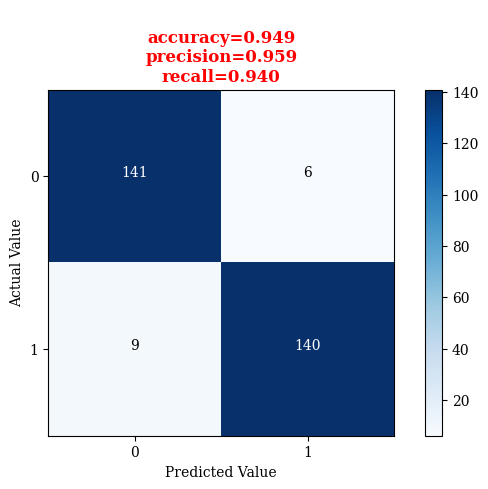

In [11]:
import itertools
import warnings
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

# 使用适合 'l1' 惩罚的求解器 
# Use solver suitable for 'l1' penalty
best_c = printing_Kfold_scores(X_train_undersample, y_train_undersample)  # 选择最好的C参数 / Select the best 'C' parameter
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')  # 或者使用 solver='saga' / Or use solver='saga'

# 训练模型 
# Fit the logistic regression model
lr.fit(X_train_undersample, y_train_undersample.values.ravel())

# 预测测试集的标签 
# Predict the labels for the test set
y_pred_undersample = lr.predict(X_test_undersample.values)

# 对比预测值和实际结果，计算混淆矩阵 
# Compare predictions to actual results and compute the confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample, y_pred_undersample)
np.set_printoptions(precision=2)  # 设置 NumPy 输出精度为 2 位小数 / Set NumPy output precision to 2 decimal places

# 绘制混淆矩阵 
# Plot the confusion matrix
class_names = [0, 1]  # 类别名称：0 表示正常，1 表示欺诈 / Class names: 0 = Normal, 1 = Fraud
plt.figure()  # 创建一个新的图形 / Create a new figure
plot_confusion_matrix(cnf_matrix, classes=class_names, title=(''))  # 调用绘制混淆矩阵的函数 / Call the function to plot the confusion matrix
plt.show()  # 显示图形 / Display the plot

#### 下采样数据训练，跑真实数据验证 Train on Undersampled Data, Validate on Real Data

   C_parameter Mean_recall_score
0         0.01          0.952997
1         0.10          0.894314
2         1.00          0.909919
3        10.00          0.909919
4       100.00          0.912451
*********************************************************************************
best_c =  0.01
*********************************************************************************


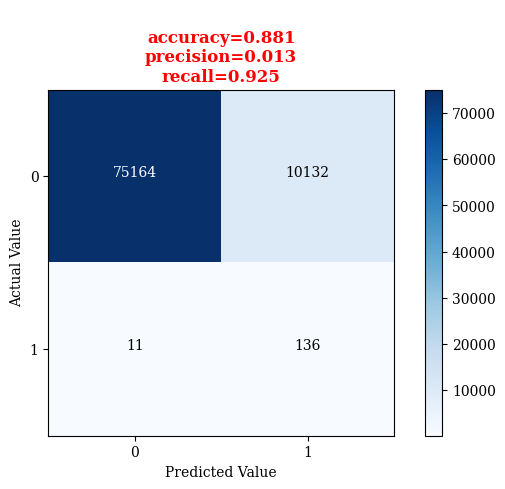

In [16]:
# 还是用下采样模型训练
# Continue training using the undersampling model
best_c = printing_Kfold_scores(X_train_undersample, y_train_undersample)
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())

# 但这次用训练出的模型跑真实测试数据
# But this time, use the trained model to run on real test data
y_pred = lr.predict(X_test.values)

# 对比预测值和结果，计算混淆矩阵
# Compare the predicted values with the actual results 
# and compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# 绘制混淆矩阵
# Plot the confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title=(''))
plt.show()

#### 真实数据训练，跑真实数据验证 Train on Real Data, Validate on Real Data

   C_parameter Mean_recall_score
0         0.01          0.559568
1         0.10           0.59531
2         1.00          0.612646
3        10.00          0.618479
4       100.00          0.618479
*********************************************************************************
best_c =  10.0
*********************************************************************************


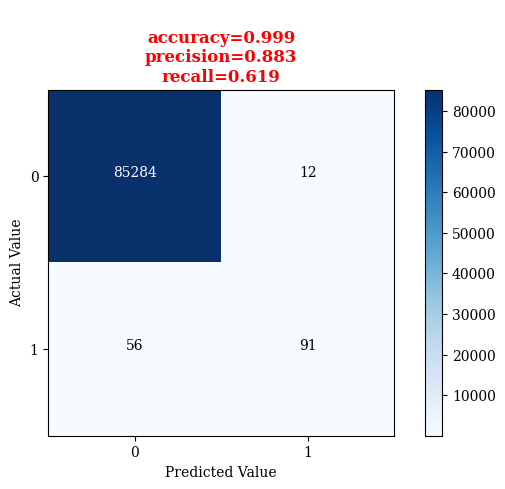

In [17]:
# 采用真实模型训练
# Train the model using the full dataset
best_c = printing_Kfold_scores(X_train, y_train)
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')
lr.fit(X_train, y_train.values.ravel())

# 但这次用训练出的模型跑真实测试数据
# But this time, use the trained model to run on real test data
y_pred = lr.predict(X_test.values)

# 对比预测值和结果，计算混淆矩阵
# Compare the predicted values with the actual results 
# and compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# 绘制混淆矩阵
# Plot the confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title=(''))
plt.show()

### 调整分类阈值对结果的影响 The Impact of Adjusting the Classification Threshold on Results

#### 下采样数据训练，跑下采样数据验证 Train on Undersampled Data, Validate on Undersampled Data

   C_parameter Mean_recall_score
0         0.01          0.952997
1         0.10          0.894314
2         1.00          0.909919
3        10.00          0.909919
4       100.00          0.914983
*********************************************************************************
best_c =  0.01
*********************************************************************************


<Figure size 1000x1000 with 0 Axes>

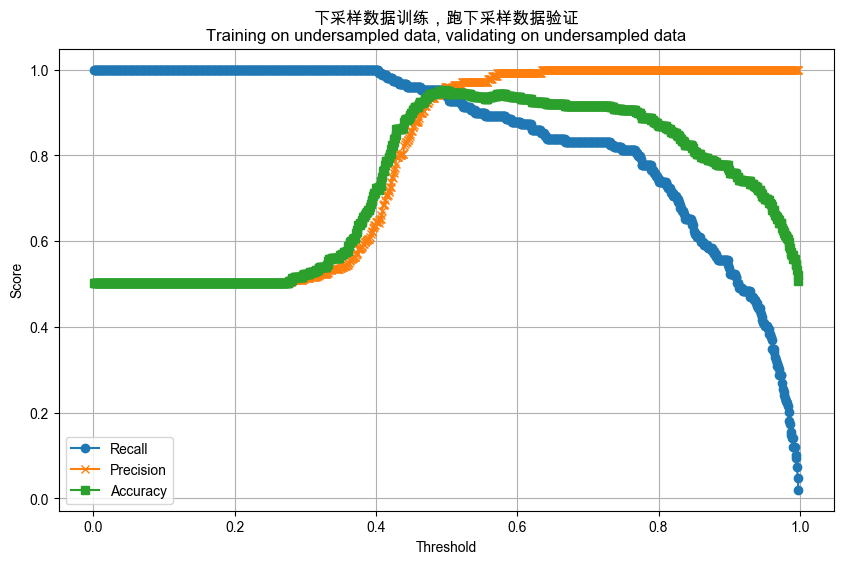

In [21]:
# 解决中文显示问题
# Solve the issue of displaying Chinese characters
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='Arial Unicode MS')

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# Ensure proper display of Chinese labels
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# Ensure proper display of negative signs


# 用之前最好的参数来进行建模
# Use the best hyperparameters from previous tuning to build the model
best_c = printing_Kfold_scores(X_train_undersample, y_train_undersample)
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')

# 还是用下采样的数据集训练模型
# Continue training the model using the undersampled dataset
lr.fit(X_train_undersample, y_train_undersample.values.ravel())

# 预测下采样结果的概率值
# Predict the probabilities on the undersampled test dataset
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

# 指定不同的阈值
# Specify different thresholds
# 使用 numpy 生成 999 个等间隔的阈值，范围从 0.001 到 0.999
# Generate 999 equally spaced thresholds between 0.001 and 0.999 using numpy
thresholds = np.linspace(0.001, 0.998, 998)

plt.figure(figsize=(10, 10))


# 用于存储每个阈值的评估指标
# Lists to store evaluation metrics for each threshold
recalls = []
precisions = []
accuracies = []

# 用混淆矩阵来进行展示
# Display the results using a confusion matrix
for threshold in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:, 1] > threshold

    cnf_matrix = confusion_matrix(y_test_undersample, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    # 计算召回率
    # Calculate recall
    recall = cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1])
    
    # 计算精确率
    # Calculate precision
    precision = cnf_matrix[1, 1] / (cnf_matrix[0, 1] + cnf_matrix[1, 1])
    
    # 计算准确率
    # Calculate accuracy
    accuracy = (cnf_matrix[0, 0] + cnf_matrix[1, 1]) / (
        cnf_matrix[0, 0] + cnf_matrix[0, 1] + cnf_matrix[1, 0] + cnf_matrix[1, 1]
    )
    
    # 将计算出的评估指标添加到对应的列表中
    # Append the computed metrics to the respective lists
    recalls.append(recall)
    precisions.append(precision)
    accuracies.append(accuracy)

# 绘制评估指标的折线图
# Plot the line graph for each evaluation metric
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, marker='o', label='Recall')
plt.plot(thresholds, precisions, marker='x', label='Precision')
plt.plot(thresholds, accuracies, marker='s', label='Accuracy')
plt.title('下采样数据训练，跑下采样数据验证\nTraining on undersampled data, validating on undersampled data')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

#### 下采样数据训练，跑真实数据验证 Train on Undersampled Data, Validate on Real Data

   C_parameter Mean_recall_score
0         0.01          0.952997
1         0.10          0.894314
2         1.00          0.909919
3        10.00          0.909919
4       100.00          0.917514
*********************************************************************************
best_c =  0.01
*********************************************************************************


<Figure size 1000x1000 with 0 Axes>

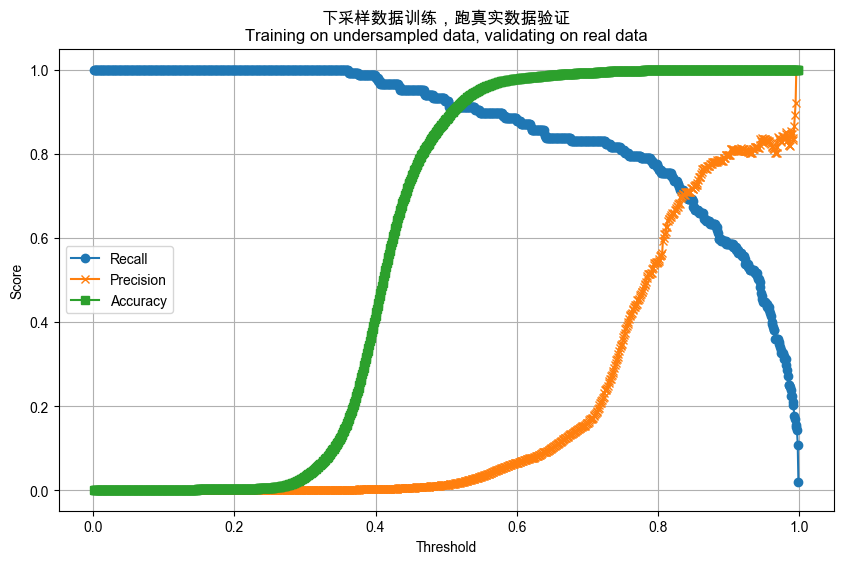

In [23]:
# 解决中文显示问题
# Solve the issue of displaying Chinese characters
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='Arial Unicode MS')

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# Ensure proper display of Chinese labels
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# Ensure proper display of negative signs

# 用之前最好的参数来进行建模
# Use the best hyperparameters from previous tuning to build the model
best_c = printing_Kfold_scores(X_train_undersample, y_train_undersample)
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')

# 还是用下采样的数据集训练模型
# Continue training the model using the undersampled dataset
lr.fit(X_train_undersample, y_train_undersample.values.ravel())

# 预测真实结果的概率值
# Predict the probabilities on the real test dataset
y_pred_proba = lr.predict_proba(X_test.values)

# 指定不同的阈值
# Specify different thresholds
# 使用 numpy 生成 999 个等间隔的阈值，范围从 0.001 到 0.999
# Generate 999 equally spaced thresholds between 0.001 and 0.999 using numpy
thresholds = np.linspace(0.001, 0.999, 999)

plt.figure(figsize=(10, 10))

# 用于存储每个阈值的评估指标
# Lists to store evaluation metrics for each threshold
recalls = []
precisions = []
accuracies = []

# 用混淆矩阵来进行展示
# Display the results using a confusion matrix
for threshold in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:, 1] > threshold

    cnf_matrix = confusion_matrix(y_test, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    # 计算召回率
    # Calculate recall
    recall = cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1])
    
    # 计算精确率
    # Calculate precision
    precision = cnf_matrix[1, 1] / (cnf_matrix[0, 1] + cnf_matrix[1, 1])
    
    # 计算准确率
    # Calculate accuracy
    accuracy = (cnf_matrix[0, 0] + cnf_matrix[1, 1]) / (
        cnf_matrix[0, 0] + cnf_matrix[0, 1] + cnf_matrix[1, 0] + cnf_matrix[1, 1]
    )
    
    # 将计算出的评估指标添加到对应的列表中
    # Append the computed metrics to the respective lists
    recalls.append(recall)
    precisions.append(precision)
    accuracies.append(accuracy)

# 绘制评估指标的折线图
# Plot the line graph for each evaluation metric
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, marker='o', label='Recall')
plt.plot(thresholds, precisions, marker='x', label='Precision')
plt.plot(thresholds, accuracies, marker='s', label='Accuracy')
plt.title('下采样数据训练，跑真实数据验证\nTraining on undersampled data, validating on real data')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

#### 真实数据训练，跑真实数据验证 Train on Real Data, Validate on Real Data

   C_parameter Mean_recall_score
0         0.01          0.559568
1         0.10           0.59531
2         1.00          0.612646
3        10.00          0.618479
4       100.00          0.618479
*********************************************************************************
best_c =  10.0
*********************************************************************************


<Figure size 1000x1000 with 0 Axes>

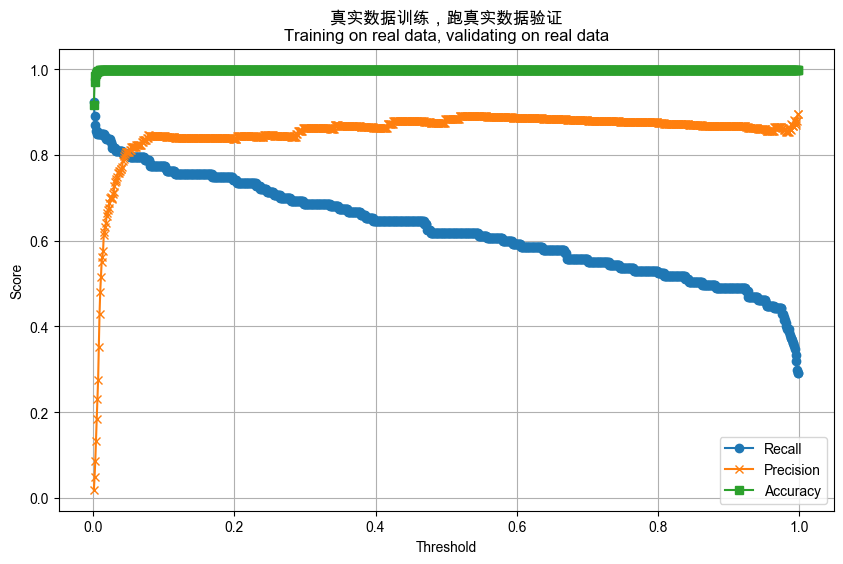

In [24]:
# 解决中文显示问题
# Solve the issue of displaying Chinese characters
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='Arial Unicode MS')

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# Ensure proper display of Chinese labels
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# Ensure proper display of negative signs

# 用之前最好的参数来进行建模
# Use the best hyperparameters from previous tuning to build the model
best_c = printing_Kfold_scores(X_train, y_train)
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')

# 用真实的数据集训练模型
# Train the model using the full dataset
lr.fit(X_train, y_train.values.ravel())

# 预测真实结果的概率值
# Predict the probabilities on the real test dataset
y_pred_proba = lr.predict_proba(X_test.values)

# 指定不同的阈值
# Specify different thresholds
# 使用 numpy 生成 999 个等间隔的阈值，范围从 0.001 到 0.999
# Generate 999 equally spaced thresholds between 0.001 and 0.999 using numpy
thresholds = np.linspace(0.001, 0.999, 999)

plt.figure(figsize=(10, 10))

# 用于存储每个阈值的评估指标
# Lists to store evaluation metrics for each threshold
recalls = []
precisions = []
accuracies = []

# 用混淆矩阵来进行展示
# Display the results using a confusion matrix
for threshold in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:, 1] > threshold

    cnf_matrix = confusion_matrix(y_test, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    # 计算召回率
    # Calculate recall
    recall = cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1])
    
    # 计算精确率
    # Calculate precision
    precision = cnf_matrix[1, 1] / (cnf_matrix[0, 1] + cnf_matrix[1, 1])
    
    # 计算准确率
    # Calculate accuracy
    accuracy = (cnf_matrix[0, 0] + cnf_matrix[1, 1]) / (
        cnf_matrix[0, 0] + cnf_matrix[0, 1] + cnf_matrix[1, 0] + cnf_matrix[1, 1]
    )
    
    # 将计算出的评估指标添加到对应的列表中
    # Append the computed metrics to the respective lists
    recalls.append(recall)
    precisions.append(precision)
    accuracies.append(accuracy)

# 绘制评估指标的折线图
# Plot the line graph for each evaluation metric
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, marker='o', label='Recall')
plt.plot(thresholds, precisions, marker='x', label='Precision')
plt.plot(thresholds, accuracies, marker='s', label='Accuracy')
plt.title('真实数据训练，跑真实数据验证\nTraining on real data, validating on real data')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

## 过采样 Oversamping

### SMOTE生成异常样本 SMOTE generating anomaly data

In [25]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # Ensure you have imbalanced-learn installed

%matplotlib inline

# 特征标准化
# Feature standardization
data = pd.read_csv("creditcard.csv")
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)

# 从数据中抽取特征和标签
# Extract features and labels from the dataset
X = data.drop('Class', axis=1)
y = data['Class']

# 对整个数据集进行划分
# Split the entire dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 基于SMOTE算法来进行样本生成，这样正例和负例样本数量就是一致的了
# Generate synthetic samples using the SMOTE algorithm to balance the number of positive and negative samples
oversampler = SMOTE(random_state=0)
X_train_os, y_train_os = oversampler.fit_resample(X_train, y_train)

# 打印训练集和SMOTE平衡后的数据集的大小
# Print the sizes of the original training set and the SMOTE-balanced training set
print("len(X_train)=", len(X_train))          # 原始训练集的样本数量
# Number of samples in the original training set
print("len(y_train)=", len(y_train))          # 原始标签集的样本数量
# Number of labels in the original training set
print("len(y_train[1])=", len(y_train[y_train == 1]))  # 原始训练集正例样本数量
# Number of positive samples in the original training set
print("len(y_train[0])=", len(y_train[y_train == 0]))  # 原始训练集负例样本数量
# Number of negative samples in the original training set
print()
print("len(X_train_os)=", len(X_train_os))    # SMOTE平衡后的训练集样本数量
# Number of samples in the SMOTE-balanced training set
print("len(y_train_os)=", len(y_train_os))    # SMOTE平衡后的标签集样本数量
# Number of labels in the SMOTE-balanced training set
print()
print("len(y_train_os==1)", len(y_train_os[y_train_os == 1]))  # SMOTE平衡后正例样本数量
# Number of positive samples in the SMOTE-balanced training set
print("len(y_train_os==0)", len(y_train_os[y_train_os == 0]))  # SMOTE平衡后负例样本数量
# Number of negative samples in the SMOTE-balanced training set

len(X_train)= 199364
len(y_train)= 199364
len(y_train[1])= 345
len(y_train[0])= 199019

len(X_train_os)= 398038
len(y_train_os)= 398038

len(y_train_os==1) 199019
len(y_train_os==0) 199019


### 计算效果 Evaluate the Effectiveness 

#### 过采样数据训练，跑过采样数据数据 Train on Oversampled Data, Validate on Oversampled Data

   C_parameter Mean_recall_score
0         0.01          0.909642
1         0.10          0.912066
2         1.00          0.912247
3        10.00          0.912373
4       100.00          0.912292
*********************************************************************************
best_c =  10.0
*********************************************************************************


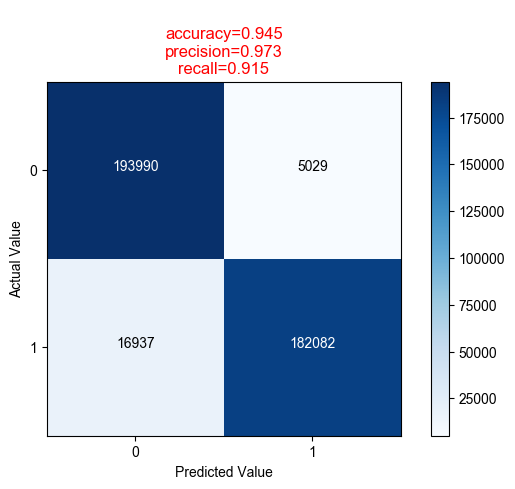

In [30]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

# 模型训练
# Model training
best_c = printing_Kfold_scores(X_train_os, y_train_os)
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')

# 在平衡后的训练数据上训练逻辑回归模型
# Train the logistic regression model using the balanced training data
lr.fit(X_train_os, y_train_os.values.ravel())

# 但这次用训练出的模型跑真实测试数据
# But this time, use the trained model to run on real test data
y_pred = lr.predict(X_train_os.values)

# 对比预测值和结果，计算混淆矩阵
# Compare the predicted values with actual results and compute the confusion matrix
cnf_matrix = confusion_matrix(y_train_os, y_pred)
np.set_printoptions(precision=2)

# 绘制混淆矩阵
# Plot the confusion matrix
class_names = [0, 1]  # 0: Negative class, 1: Positive class
plt.figure()

# Assuming you have a function `plot_confusion_matrix` to visualize the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names, title=(''))
plt.show()

#### 过采样数据训练，跑真实数据 Train on Oversampled Data, Validate on Real Data

   C_parameter Mean_recall_score
0         0.01          0.909657
1         0.10          0.912094
2         1.00          0.912265
3        10.00          0.912209
4       100.00          0.912227
*********************************************************************************
best_c =  1.0
*********************************************************************************


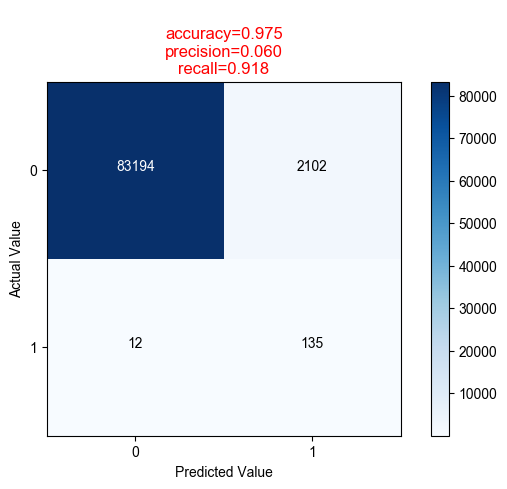

In [31]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

# 模型训练
# Model training
best_c = printing_Kfold_scores(X_train_os, y_train_os)
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')

# 在平衡后的训练数据上训练逻辑回归模型
# Train the logistic regression model using the balanced training data
lr.fit(X_train_os, y_train_os.values.ravel())

# 但这次用训练出的模型跑真实测试数据
# But this time, use the trained model to run on real test data
y_pred = lr.predict(X_test.values)

# 对比预测值和结果，计算混淆矩阵
# Compare the predicted values with actual results and compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# 绘制混淆矩阵
# Plot the confusion matrix
class_names = [0, 1]  # 0: Negative class, 1: Positive class
plt.figure()

# Assuming you have a function `plot_confusion_matrix` to visualize the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names, title=(''))
plt.show()

### 调整分类阈值对结果的影响 The Impact of Adjusting the Classification Threshold on Results

<Figure size 1000x1000 with 0 Axes>

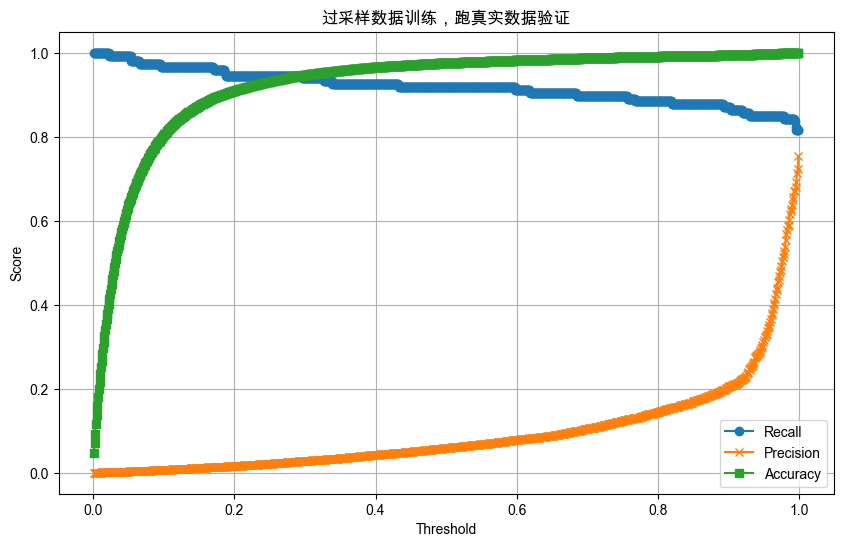

In [32]:
# 解决中文显示问题
# Solve the issue of displaying Chinese characters
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='Arial Unicode MS')

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# Ensure proper display of Chinese labels
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# Ensure proper display of negative signs

# 用之前最好的参数来进行建模
# Use the best hyperparameters from previous tuning to build the model
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')

# 用过采样的数据集训练模型
# Train the model using the oversampled dataset
lr.fit(X_train_os, y_train_os.values.ravel())

# 预测真实结果的概率值
# Predict the probabilities on the real test dataset
y_pred_proba = lr.predict_proba(X_test.values)

# 指定不同的阈值
# Specify different thresholds
# 使用 numpy 生成 999 个等间隔的阈值，范围从 0.001 到 0.999
# Generate 999 equally spaced thresholds between 0.001 and 0.999 using numpy
thresholds = np.linspace(0.001, 0.999, 999)

plt.figure(figsize=(10, 10))

# 用于存储每个阈值的评估指标
# Lists to store evaluation metrics for each threshold
recalls = []
precisions = []
accuracies = []

# 用混淆矩阵来进行展示
# Display the results using a confusion matrix
for threshold in thresholds:
    # 根据当前阈值，生成预测结果
    # Generate predictions based on the current threshold
    y_test_predictions_high_recall = y_pred_proba[:, 1] > threshold

    # 计算混淆矩阵
    # Compute the confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    # 计算召回率
    # Calculate recall
    recall = cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1])
    
    # 计算精确率
    # Calculate precision
    precision = cnf_matrix[1, 1] / (cnf_matrix[0, 1] + cnf_matrix[1, 1])
    
    # 计算准确率
    # Calculate accuracy
    accuracy = (cnf_matrix[0, 0] + cnf_matrix[1, 1]) / (
        cnf_matrix[0, 0] + cnf_matrix[0, 1] + cnf_matrix[1, 0] + cnf_matrix[1, 1]
    )
    
    # 将计算出的评估指标添加到对应的列表中
    # Append the computed metrics to the respective lists
    recalls.append(recall)
    precisions.append(precision)
    accuracies.append(accuracy)

# 绘制评估指标的折线图
# Plot the line graph for each evaluation metric
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, marker='o', label='Recall')
plt.plot(thresholds, precisions, marker='x', label='Precision')
plt.plot(thresholds, accuracies, marker='s', label='Accuracy')
plt.title('过采样数据训练，跑真实数据验证')
# Title: Training on oversampled data, validating on real data
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

## 神经网络分类 neural network classification

### 下采样数据训练，跑真实数据验证 Train on Undersampled Data, Validate on Real Data

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5882 - loss: 0.8866   
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8716 - loss: 0.2972 
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9311 - loss: 0.2143 
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9341 - loss: 0.1875 
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9276 - loss: 0.1732 
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9358 - loss: 0.1647 
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9503 - loss: 0.1308 
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9466 - loss: 0.1308 
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9615 - loss: 0.0995 
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9658 - loss: 0.1081 
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 660us/step


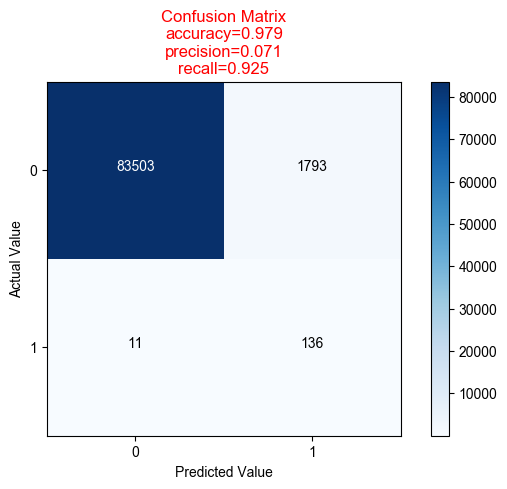

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')
warnings.filterwarnings('ignore', category=UserWarning)

# 构建神经网络模型
# Build the neural network model
model = Sequential()

# 输入层和第一隐藏层（64个神经元，ReLU激活函数）
# Input layer and first hidden layer (64 neurons, ReLU activation)
model.add(Dense(64, input_dim=X_train_undersample.shape[1], activation='relu'))

# 第二隐藏层（32个神经元，ReLU激活函数）
# Second hidden layer (32 neurons, ReLU activation)
model.add(Dense(32, activation='relu'))

# 输出层（2个神经元，softmax激活函数，用于二分类）
# Output layer (2 neurons, softmax activation for binary classification)
model.add(Dense(2, activation='softmax'))

# 编译模型，使用Adam优化器和交叉熵损失函数
# Compile the model with Adam optimizer and cross-entropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 在平衡后的训练数据上训练神经网络模型
# Train the neural network model using the balanced training data
model.fit(X_train_undersample, to_categorical(y_train_undersample), epochs=10, batch_size=32)

# 但这次用训练出的模型跑真实测试数据
# Use the trained model to run on real test data
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)  # 获取预测类别 (0或1)
# Get the predicted class (0 or 1)

# 对比预测值和结果，计算混淆矩阵
# Compare the predicted values with actual results and compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# 绘制混淆矩阵
# Plot the confusion matrix
class_names = [0, 1]  # 0: Negative class, 1: Positive class
plt.figure()

# 假设你有函数 `plot_confusion_matrix` 来可视化混淆矩阵
# Assuming you have a function `plot_confusion_matrix` to visualize the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

### 过采样数据训练，跑真实数据 Train on Oversampled Data, Validate on Real Data

Epoch 1/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 10s 745us/step - accuracy: 0.9859 - loss: 0.0407
Epoch 2/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 9s 730us/step - accuracy: 0.9989 - loss: 0.0052
Epoch 3/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 10s 783us/step - accuracy: 0.9992 - loss: 0.0034
Epoch 4/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 10s 790us/step - accuracy: 0.9994 - loss: 0.0028
Epoch 5/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 10s 761us/step - accuracy: 0.9994 - loss: 0.0026
Epoch 6/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 10s 765us/step - accuracy: 0.9996 - loss: 0.0024
Epoch 7/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 10s 774us/step - accuracy: 0.9996 - loss: 0.0017
Epoch 8/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 10s 815us/step - accuracy: 0.9997 - loss: 0.0014
Epoch 9/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 9s 752us/step - accuracy: 0.9997 - loss: 0.0014
Epoch 10/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 9s 760us/step - accuracy: 0.9997 - loss: 0.0014
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 599us/step


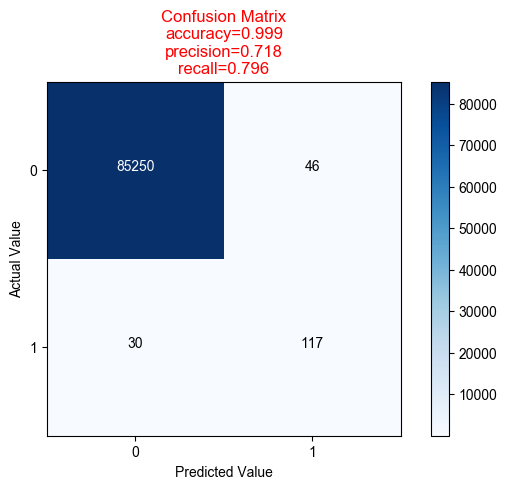

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')
warnings.filterwarnings('ignore', category=UserWarning)

# 构建神经网络模型
# Build the neural network model
model = Sequential()

# 输入层和第一隐藏层（64个神经元，ReLU激活函数）
# Input layer and first hidden layer (64 neurons, ReLU activation)
model.add(Dense(64, input_dim=X_train_os.shape[1], activation='relu'))

# 第二隐藏层（32个神经元，ReLU激活函数）
# Second hidden layer (32 neurons, ReLU activation)
model.add(Dense(32, activation='relu'))

# 输出层（2个神经元，softmax激活函数，用于二分类）
# Output layer (2 neurons, softmax activation for binary classification)
model.add(Dense(2, activation='softmax'))

# 编译模型，使用Adam优化器和交叉熵损失函数
# Compile the model with Adam optimizer and cross-entropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 在平衡后的训练数据上训练神经网络模型
# Train the neural network model using the balanced training data
model.fit(X_train_os, to_categorical(y_train_os), epochs=10, batch_size=32)

# 但这次用训练出的模型跑真实测试数据
# Use the trained model to run on real test data
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)  # 获取预测类别 (0或1)
# Get the predicted class (0 or 1)

# 对比预测值和结果，计算混淆矩阵
# Compare the predicted values with actual results and compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# 绘制混淆矩阵
# Plot the confusion matrix
class_names = [0, 1]  # 0: Negative class, 1: Positive class
plt.figure()

# 假设你有函数 `plot_confusion_matrix` 来可视化混淆矩阵
# Assuming you have a function `plot_confusion_matrix` to visualize the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

### 真实数据训练，跑真实数据验证 Train on Real Data, Validate on Real Data

Epoch 1/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 6s 727us/step - accuracy: 0.9985 - loss: 0.0134
Epoch 2/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 732us/step - accuracy: 0.9994 - loss: 0.0029
Epoch 3/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 727us/step - accuracy: 0.9994 - loss: 0.0028
Epoch 4/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 732us/step - accuracy: 0.9994 - loss: 0.0025
Epoch 5/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 729us/step - accuracy: 0.9995 - loss: 0.0021
Epoch 6/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 731us/step - accuracy: 0.9994 - loss: 0.0023
Epoch 7/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 739us/step - accuracy: 0.9995 - loss: 0.0020
Epoch 8/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 741us/step - accuracy: 0.9995 - loss: 0.0020
Epoch 9/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 739us/step - accuracy: 0.9995 - loss: 0.0018
Epoch 10/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 750us/step - accuracy: 0.9995 - loss: 0.0019
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 605us/step


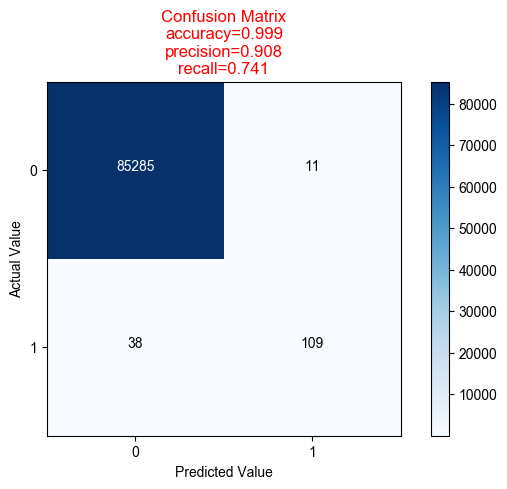

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')
warnings.filterwarnings('ignore', category=UserWarning)

# 构建神经网络模型
# Build the neural network model
model = Sequential()

# 输入层和第一隐藏层（64个神经元，ReLU激活函数）
# Input layer and first hidden layer (64 neurons, ReLU activation)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# 第二隐藏层（32个神经元，ReLU激活函数）
# Second hidden layer (32 neurons, ReLU activation)
model.add(Dense(32, activation='relu'))

# 输出层（2个神经元，softmax激活函数，用于二分类）
# Output layer (2 neurons, softmax activation for binary classification)
model.add(Dense(2, activation='softmax'))

# 编译模型，使用Adam优化器和交叉熵损失函数
# Compile the model with Adam optimizer and cross-entropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 在平衡后的训练数据上训练神经网络模型
# Train the neural network model using the balanced training data
model.fit(X_train, to_categorical(y_train), epochs=10, batch_size=32)

# 但这次用训练出的模型跑真实测试数据
# Use the trained model to run on real test data
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)  # 获取预测类别 (0或1)
# Get the predicted class (0 or 1)

# 对比预测值和结果，计算混淆矩阵
# Compare the predicted values with actual results and compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# 绘制混淆矩阵
# Plot the confusion matrix
class_names = [0, 1]  # 0: Negative class, 1: Positive class
plt.figure()

# 假设你有函数 `plot_confusion_matrix` 来可视化混淆矩阵
# Assuming you have a function `plot_confusion_matrix` to visualize the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()